# Comparing Annotations between Computer Labels

### Examples, Examples, Errors

In [58]:
# csv to open files, plt and np to plot
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib import image

In [59]:
# functions to open and read csv files w/ annotations
def openCSV_getData(file_csv):
    file = open(file_csv)
    type(file)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    rows = rows[3:]
    data = []
    for i in range(len(rows)):
        temp = rows[i][:]
        temp.pop(-1)
        temp.pop(15)
        temp.pop(12)
        temp.pop(9)
        temp.pop(6)
        temp.pop(3)
        temp.pop(0)
        data.append(temp)
    return data

def distanceBetweenPoints(x1, y1, x2, y2):
    xDiff = abs(x2 - x1)
    yDiff = abs(y2 - y1)
    xDiff = xDiff**2
    yDiff = yDiff**2
    distance = xDiff + yDiff
    distance = math.pow(distance, 1/2)
    return distance

def bubbleSort(arr):
    n = len(arr)
    swapped = False
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j][0] > arr[j + 1][0]:
                swapped = True
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
        if not swapped:
            return
        
def bubbleSort_reverse(arr):
    n = len(arr)
    swapped = False
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j][0] < arr[j + 1][0]:
                swapped = True
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
        if not swapped:
            return

In [60]:
# length = # of images annotated , 6 body part labels in each
folder = '/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/'
b1_j = openCSV_getData(folder + 'Block0001_Cam1DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')
b2_j = openCSV_getData(folder + 'Block0001_Cam2DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')
b3_j = openCSV_getData(folder + 'Block0001_Cam3DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')

b1_k = openCSV_getData(folder + 'Block0001_Cam1DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')
b2_k = openCSV_getData(folder + 'Block0001_Cam2DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')
b3_k = openCSV_getData(folder + 'Block0001_Cam3DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')

#b1_, img1_ = openCSV_getData(folder + '')
#b2_, img2_ = openCSV_getData(folder + '')
#b3_, img3_ = openCSV_getData(folder + '')

In [61]:
def distances(kreiman, jaeson, count, bodyPart, size):
    # big = 1
    # small = 0
    
    errors = [[0, ''], [0, ''], [0, ''], [0, ''], [0, ''], [0, ''], [0, ''], [0, ''], [0, ''], [0, '']] #format [[distance, imgName], []]
    if size == 0:
        errors = [[1000, ''], [1000, ''], [1000, ''], [1000, ''], [1000, ''], [1000, ''], [1000, ''], [1000, ''], [1000, ''], [1000, '']] #format [[distance, imgName], []]

    errors = errors[:count]
    for i in range(len(kreiman)):
        #print(bodyPart, bodyPart+1)
        k_x = float(kreiman[i][bodyPart*2])
        j_x = float(jaeson[i][bodyPart*2])
        k_y = float(kreiman[i][bodyPart*2+1])
        j_y = float(jaeson[i][bodyPart*2+1])
        dist = distanceBetweenPoints(k_x, k_y, j_x, j_y)
        
        if size == 0:
            if dist < errors[0][0]:
                errors[0] = [dist, i]
                bubbleSort_reverse(errors)
        else:
            if dist > errors[0][0]:
                errors[0] = [dist, i]
                bubbleSort(errors)
    return errors

In [62]:
def differences_in_array(kreiman, jaeson, imgCount, imgNames, bottomTop):
    block = []
    for i in range(6):
        block.append(distances(jaeson, kreiman, imgCount, i, bottomTop))
    return block

In [63]:
# loading human data
def openCSV_getData_human(file_csv):
    file = open(file_csv)
    type(file)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    temp = removeScorer_otherInfo(rows)
    data = temp[0]
    imgNames = temp[1]
    return data, imgNames

def removeScorer_otherInfo(csv_file):
    # remove indeces 0-3
    data = csv_file[3:]
    imgNames = []
    for i in range(len(data)):
        imgNames.append(data[i][2])
        temp = data[i]
        temp = temp[3:]
        data[i] = temp
    return data, imgNames

In [64]:
folder = '/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/'
b1_j_human, img1_j = openCSV_getData_human(folder + 'CollectedData_Jaeson_Block1Cam1.csv')
b2_j_human, img2_j = openCSV_getData_human(folder + 'CollectedData_Jaeson_Block1Cam2.csv')
b3_j_human, img3_j = openCSV_getData_human(folder + 'CollectedData_Jaeson_Block1Cam3.csv')

b1_k_human, img1_k = openCSV_getData_human(folder + 'CollectedData_Kreiman (1).csv')
b2_k_human, img2_k = openCSV_getData_human(folder + 'CollectedData_Kreiman (2).csv')
b3_k_human, img3_k = openCSV_getData_human(folder + 'CollectedData_Kreiman (3).csv')



In [65]:
cam1_top = differences_in_array(b1_k, b1_j, 1, img1_j, 1)
cam2_top = differences_in_array(b2_k, b2_j, 1, img2_j, 1)
cam3_top = differences_in_array(b3_k, b3_j, 1, img3_j, 1)

cam1_bottom = differences_in_array(b1_k, b1_j, 1, img1_j, 0)
cam2_bottom = differences_in_array(b2_k, b2_j, 1, img2_j, 0)
cam3_bottom = differences_in_array(b3_k, b3_j, 1, img3_j, 0)

In [66]:
def show_errors(fileName, bodyPart, cam):
    directory = '/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/'
    
    if cam == 1:
        directory += 'cam1AllFrames/frame'
    elif cam == 2:
        directory += 'cam2/frame'
    else:
        directory += 'cam3/frame'

    directory = directory + fileName + '.jpg'

    # get coordinates
    data_kreiman, data_jaeson = b1_k[:], b1_j[:]
    
    if cam == 2:
        #print("hmmmalsdkfja;lsdkjfa;lksdjf;alskdjfa;lksdjfa;lksdjfa;lsdkjfa;lskdjfa;ldskjf")
        data_kreiman = b2_k[:]
        data_jaeson = b2_j[:]
    elif cam == 3:
        data_kreiman = b3_k[:]
        data_jaeson = b3_j[:]
      
    #print(fileName)
    index = int(fileName)
    k_x = float(data_kreiman[index][bodyPart*2])
    k_y = float(data_kreiman[index][bodyPart*2+1])
    j_x = float(data_jaeson[index][bodyPart*2])
    j_y = float(data_jaeson[index][bodyPart*2+1])
    
    #distance_temp = distanceBetweenPoints(k_x, k_y, j_x, j_y)
    #print("distance is ", distance_temp)

    # print(directory)
    img = plt.imread(directory)
    plt.plot(k_x, k_y, color='r', marker='.', markersize=20)
    plt.plot(j_x, j_y, color='b', marker='.', markersize=20)
    
    #scalebar = ScaleBar(600/620, 'px', rotation="vertical", scale_loc="right", dimension="pixel-length",
                           #color="white", border_pad=0.6, box_alpha=0) # 1 pixel = 0.2 meter
    
    plt.axis('off')
    #plt.gca().add_artist(scalebar)
    plt.imshow(img)
    plt.show()

In [67]:
def plot_imgs(arr, cam):
    xLab = ['lf', 'lk', 'lt', 'rf', 'rk', 'rt', 'avg']
    for part in range(len(arr)): # 6
        print(xLab[part])
        for i in range(len(arr[part])): # 3
            imgName = arr[part][i][1]
            print(arr[part][i][0])
            show_errors(str(imgName), part, cam)
        print()
        print()

In [68]:
len(cam1_top[0])

1

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar

lf
148.6376121694105


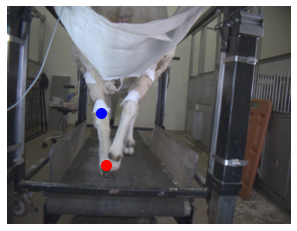



lk
265.80914612413824


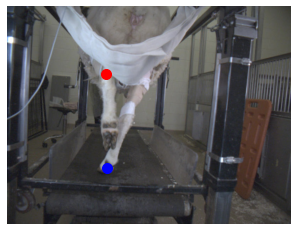



lt
356.0096876283072


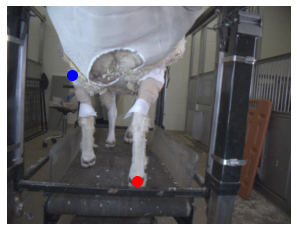



rf
294.33601570998536


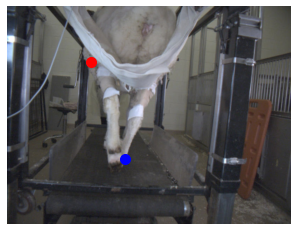



rk
40.74268311796171


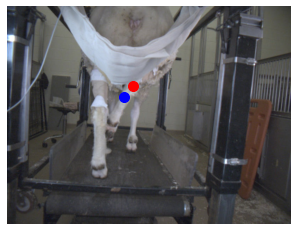



rt
293.90523490396635


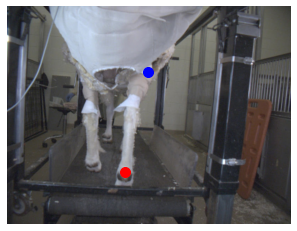

In [70]:
# red is kreiman
# blue is jaeson
plot_imgs(cam1_top, 1)

In [71]:
# plot_imgs(cam2_top, 2)

In [72]:
# plot_imgs(cam3_top, 3)

lf
0.10115212280814993


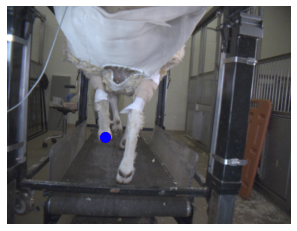



lk
0.0442286365092136


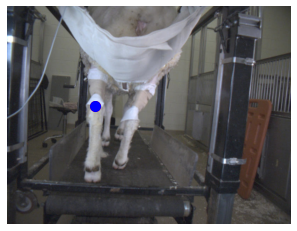



lt
12.00165226922416


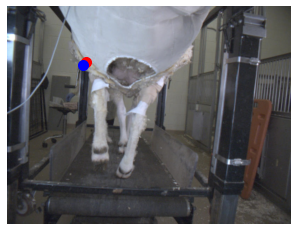



rf
0.1606730345973804


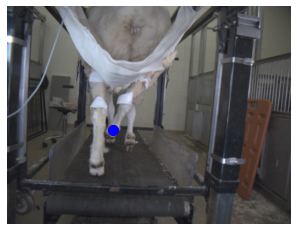



rk
0.4588689628538153


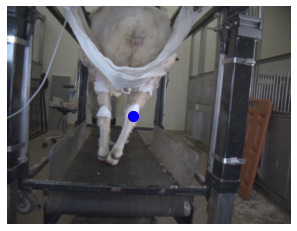



rt
5.662074929866518


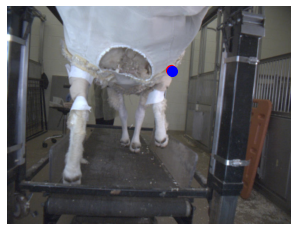

In [73]:
plot_imgs(cam1_bottom, 1)

In [74]:
# plot_imgs(cam2_bottom, 2)

In [75]:
# plot_imgs(cam3_bottom, 3)

## 3.24.23 Plotting Images w/ Errors 40-60 px

In [76]:
def dist(kreiman, jaeson):
    dists = []
    for i in range(len(kreiman)): 
        for bodyPart in range(6):
            k_x = float(kreiman[i][bodyPart*2])
            j_x = float(jaeson[i][bodyPart*2])
            k_y = float(kreiman[i][bodyPart*2+1])
            j_y = float(jaeson[i][bodyPart*2+1])
            dis = distanceBetweenPoints(k_x, k_y, j_x, j_y)
            dists.append(dis)
    return dists
distances_computers = dist(b1_k, b1_j)

In [77]:
def dist_part(kreiman, jaeson, part):
    dists = []
    for i in range(len(kreiman)): 

        k_x = float(kreiman[i][part*2])
        j_x = float(jaeson[i][part*2])
        k_y = float(kreiman[i][part*2+1])
        j_y = float(jaeson[i][part*2+1])
        dis = distanceBetweenPoints(k_x, k_y, j_x, j_y)
        dists.append(dis)
    return dists
distances_computers_0 = dist_part(b1_k, b1_j, 0)
distances_computers_1 = dist_part(b1_k, b1_j, 1)
distances_computers_2 = dist_part(b1_k, b1_j, 2)
distances_computers_3 = dist_part(b1_k, b1_j, 3)
distances_computers_4 = dist_part(b1_k, b1_j, 4)
distances_computers_5 = dist_part(b1_k, b1_j, 5)

In [78]:
distances_computers_0_2 = dist_part(b2_k, b2_j, 0)
distances_computers_1_2 = dist_part(b2_k, b2_j, 1)
distances_computers_2_2 = dist_part(b2_k, b2_j, 2)
distances_computers_3_2 = dist_part(b2_k, b2_j, 3)
distances_computers_4_2 = dist_part(b2_k, b2_j, 4)
distances_computers_5_2 = dist_part(b2_k, b2_j, 5)

In [79]:
distances_computers_0_3 = dist_part(b3_k, b3_j, 0)
distances_computers_1_3 = dist_part(b3_k, b3_j, 1)
distances_computers_2_3 = dist_part(b3_k, b3_j, 2)
distances_computers_3_3 = dist_part(b3_k, b3_j, 3)
distances_computers_4_3 = dist_part(b3_k, b3_j, 4)
distances_computers_5_3 = dist_part(b3_k, b3_j, 5)

1788
103.93412658655599


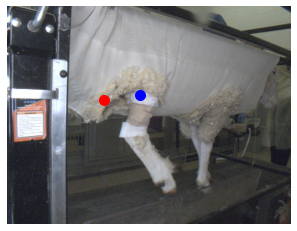

1789
103.4288619444176


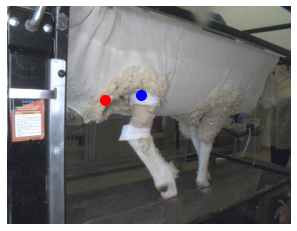

1791
102.59619283935083


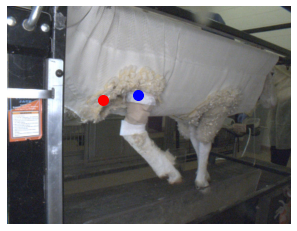

In [91]:
def plot_imgs_part(dists, bottom_range, top_range, kreiman, jaeson, bodyPart, cam):
    for i in range(len(dists)):
        if dists[i] < top_range and dists[i] > bottom_range:
            # show image
            print(i)
            print(dists[i])
            show_errors(str(i), bodyPart, cam)
        
plot_imgs_part(distances_computers_5_3, 100, 105, b3_k, b3_j, 5, 3)

2667
22.01640022492031


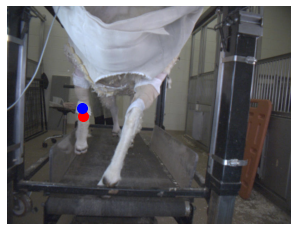

2668
20.95030710561546


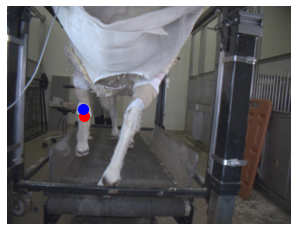

In [22]:
def plot_imgs(dists, bottom_range, top_range, kreiman, jaeson, bodyPart):
    for i in range(len(dists)):
        if i % 6 == bodyPart:
            if dists[i] < top_range and dists[i] > bottom_range:
                # show image
                print(math.ceil(i / 6) - 1)
                print(dists[i])
                show_errors(str(math.ceil(i / 6) - 1), bodyPart, 1)
        
plot_imgs(distances_computers, 20, 90, b1_k, b1_j, 1)

1716
43.118632401339475


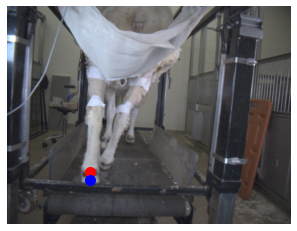

1735
45.718948306025894


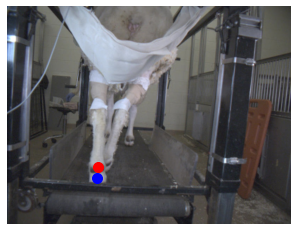

1896
41.972664129727754


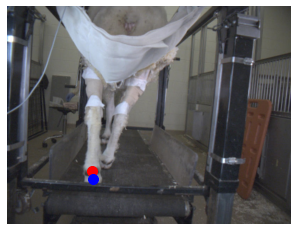

1915
41.09240156048238


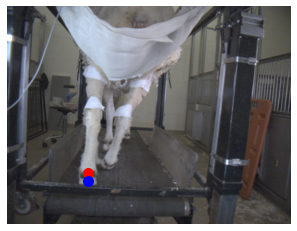

1981
47.292038127346245


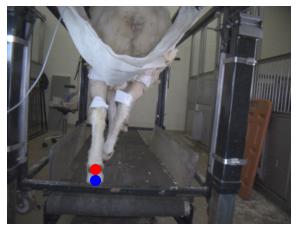

2017
40.452295779994124


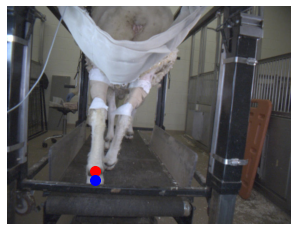

2053
46.90333222706352


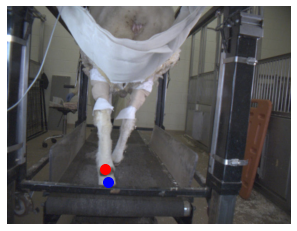

2072
43.540754210986094


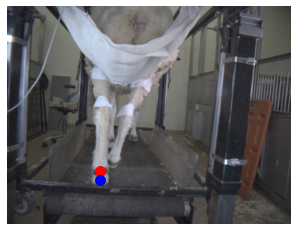

2153
43.978007139629725


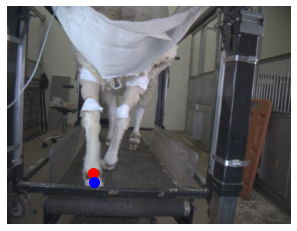

2225
42.678146656669846


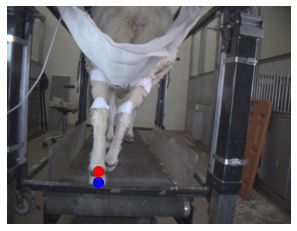

2242
43.10057687982948


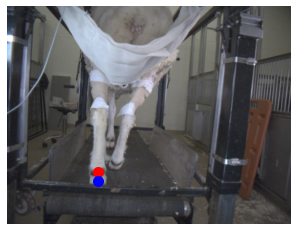

2260
46.426709230961684


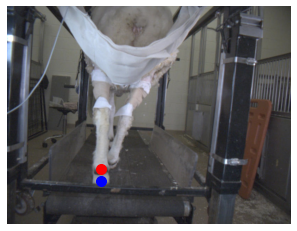

2272
45.814686544711805


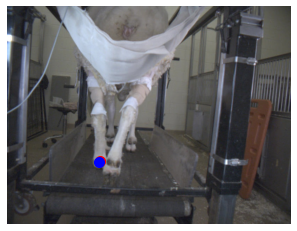

2279
42.037344920730234


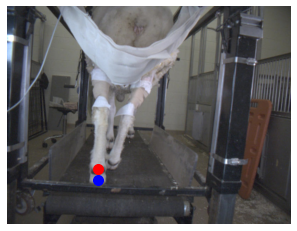

2297
44.1474810980232


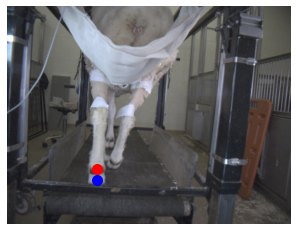

2338
44.66502736002822


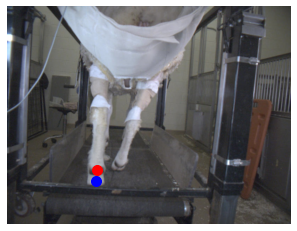

2359
45.30309369573171


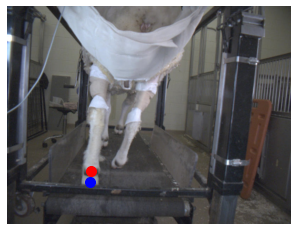

2377
45.49635902340591


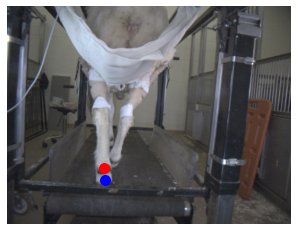

2396
47.60228022256438


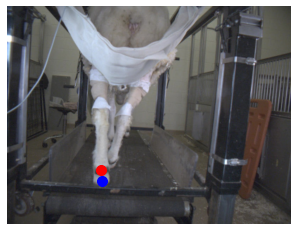

2407
54.91481735640673


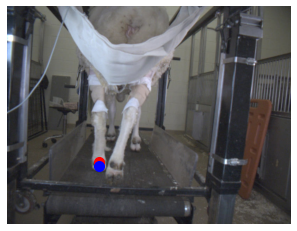

2425
50.371380851392594


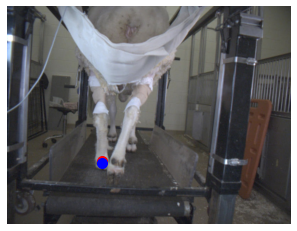

2431
45.97675171301094


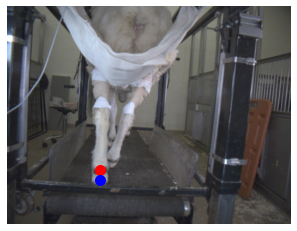

2449
43.86270795330427


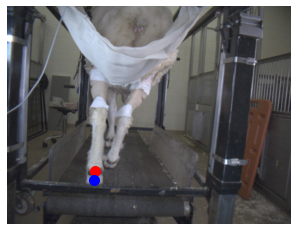

2485
42.229842623515616


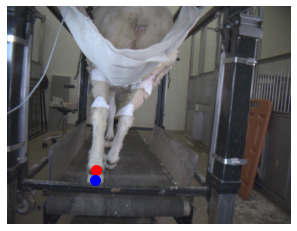

2504
41.0539835565797


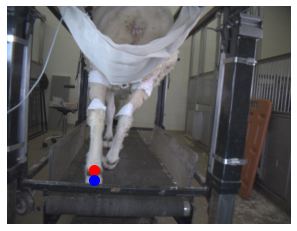

2554
43.42960362501129


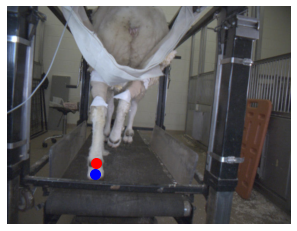

2601
42.312331814078185


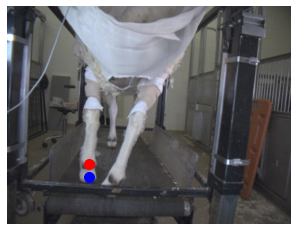

2640
41.01452439799025


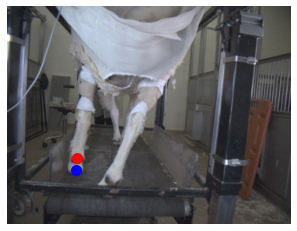

2769
40.6402436266707


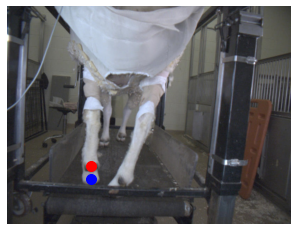

3158
41.9952166016288


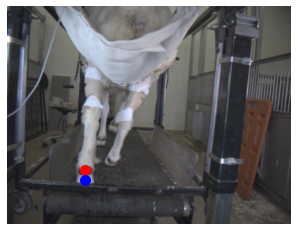

3213
41.30046750019576


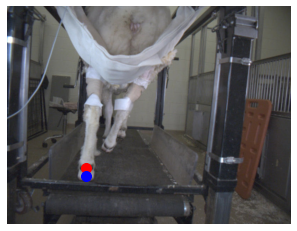

3269
41.21600466813406


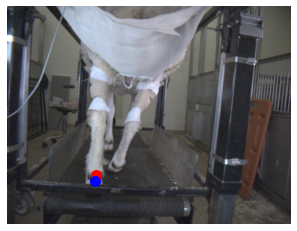

3561
43.99614789124221


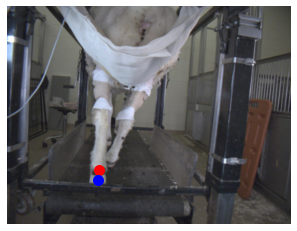

3583
40.32292092042123


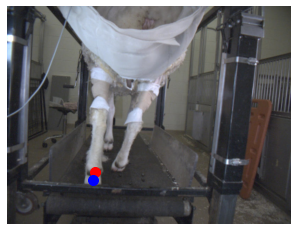

3601
44.392599582331265


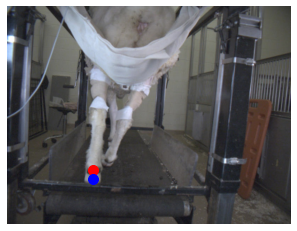

4333
41.51376929728245


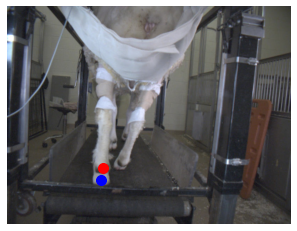

4379
53.7423269589267


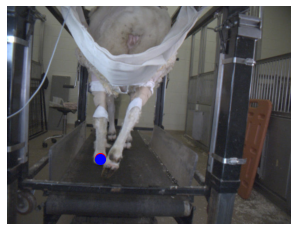

4404
41.65087890296305


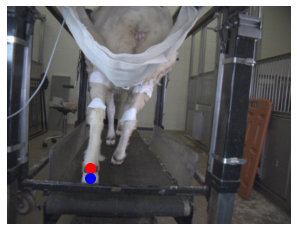

4416
42.263131130248304


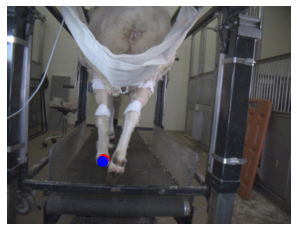

4891
50.055793681708934


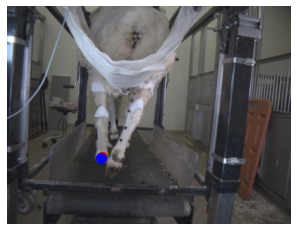

5053
57.69327726003638


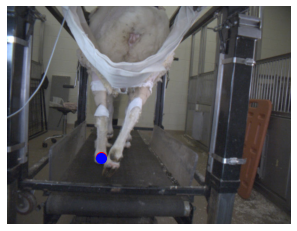

5227
40.22383318595793


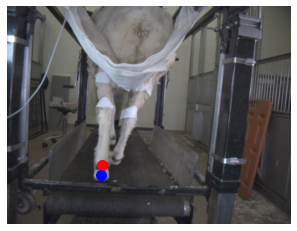

5261
42.409797283422016


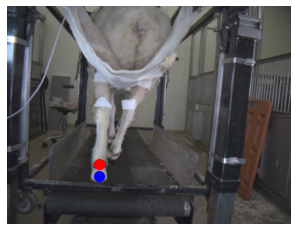

5289
55.598425958048715


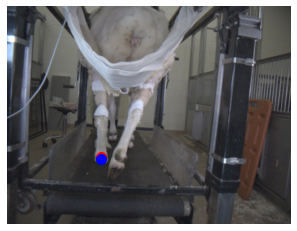

In [23]:
plot_imgs(distances_computers, 40, 60, b1_k, b1_j, 0)